# Quantum Teleportation Algorithm

### Practice with Qiskit

In this notebook I will make some practice with the Qiskit library. 

The aim is to successfully implement the quantum teleportation algorithm, i.e. move a quantum state from one qubit to another.

The state I want to teleport is $|1\rangle=X|0\rangle$.

In [1]:
from qiskit import *

In [2]:
#I start creating a circuit with 3 classical bits (for measurements) and 3 qubits.

circuit = QuantumCircuit(3, 3)

In [3]:
#I initialize the qubit 0 in the X state

circuit.x(0)
circuit.barrier()

In [4]:
#Teleportation protocol: 
#1) apply an Hadamard gate to the support qubit 1 and a C-NOT gate between 1 and 2 to entangle them
#2) apply a C-NOT gate between 0 and 1 and then an Hadamard gate to 0
#3) measure 0 and 1 - the output is stored in the corresponding classical register

circuit.h(1)
circuit.cx(1, 2)

circuit.cx(0, 1)
circuit.h(0)

circuit.barrier()
circuit.measure([0,1], [0,1])

In [5]:
#The results determines the effect of the teleportation

circuit.barrier()
circuit.cx(1, 2)
circuit.cz(0, 2)

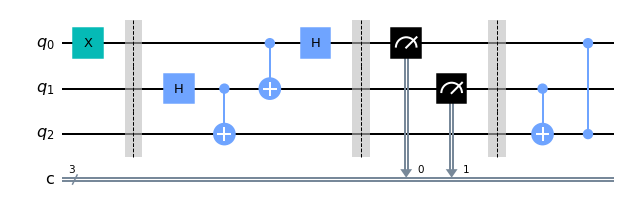

In [6]:
#let's visualize the circuit 

%matplotlib inline
circuit.draw(output="mpl")

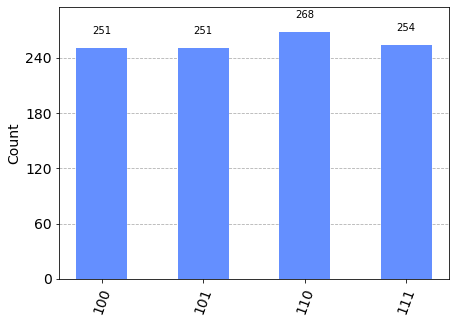

In [8]:
#The circuit will be simulated on a classical computer

circuit.measure(2, 2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

The histogram above represents the outcome of measuring the 3 qubits by repeating the experiment 1024 times.

For example the column "100" means that the outcome of the measure of $q_2$ is 1, $q_1$ is 0 and $q_0$ is 0.

From the graph we can see that the outcome of the measurement of $q_2$ is always 1: the state $|1\rangle$ has been successfully teleported from $q_0$ to $q_2$.

The experiment is now repeted teleporting the state $H|0\rangle=\frac{|0\rangle+|1\rangle}{\sqrt{2}}$.

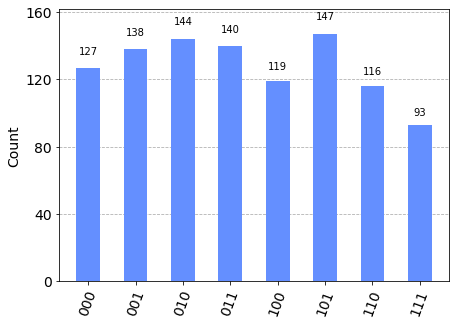

In [15]:
#Build the circuit
circuit = QuantumCircuit(3, 3)

#Initialize q_0
circuit.h(0)

#Apply the protocol
circuit.h(1)
circuit.cx(1, 2)
circuit.cx(0, 1)
circuit.h(0)
circuit.measure([0,1], [0,1])
circuit.cx(1, 2)
circuit.cz(0, 2)

#Visualize the result
circuit.measure(2, 2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

The graph shows that, as expected, there is approximately a 50% probability of measuring 0 or 1 in $q_2$.